In [52]:
import numpy as np
import pandas as pd
np.random.seed(1) #for reproductivity

In [53]:
no_sampling = 1000
class_0_ratio = 0.9
no_class_0 = int(no_sampling * class_0_ratio)
no_class_1 = 100

In [54]:
class_0_ratio

0.9

In [55]:
no_class_0


900

In [56]:
no_class_1 

100

In [57]:
len(np.random.normal(0,1,no_class_0))

900

In [58]:
class_0 = {'feature1' : np.random.normal(0,1,no_class_0),
'feature2' : np.random.normal(0,1,no_class_0),
'target' : [0]*no_class_0}

In [59]:
class_0 = pd.DataFrame(class_0)

In [60]:
class_0

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
895,0.833679,-1.322762,0
896,2.160456,0.540306,0
897,1.998992,-0.507257,0
898,0.764041,1.128379,0


In [61]:
class_1 = {'feature1' : np.random.normal(3,1,no_class_1),
'feature2' : np.random.normal(3,1,no_class_1),
'target' : [1]*no_class_1}

In [62]:
class_1 = pd.DataFrame(class_1)

In [63]:
class_1

,feature1,feature2,target
0,2.546497,2.965789,1
1,2.179095,2.718501,1
2,3.940219,3.580178,1
3,1.588707,2.136473,1
4,3.884148,3.326813,1
...,...,...,...
95,1.402786,2.274796,1
96,3.461016,2.861925,1
97,4.316506,3.250043,1
98,3.296370,3.353116,1


In [64]:
# merging two datasets
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [65]:
df

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
995,1.402786,2.274796,1
996,3.461016,2.861925,1
997,4.316506,3.250043,1
998,3.296370,3.353116,1


In [66]:
df.target.value_counts(normalize=True)

0    0.9
1    0.1
Name: target, dtype: float64

In [67]:
df_minortiy = df[df.target == 1]
df_majority = df[df.target == 0]

In [68]:
df_majority

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
895,0.833679,-1.322762,0
896,2.160456,0.540306,0
897,1.998992,-0.507257,0
898,0.764041,1.128379,0


In [69]:
df_minortiy

,feature1,feature2,target
900,2.546497,2.965789,1
901,2.179095,2.718501,1
902,3.940219,3.580178,1
903,1.588707,2.136473,1
904,3.884148,3.326813,1
...,...,...,...
995,1.402786,2.274796,1
996,3.461016,2.861925,1
997,4.316506,3.250043,1
998,3.296370,3.353116,1


# Oversampling

In [70]:
# oversampling >> upsampling >> increasing the minority to majority no
from sklearn.utils import resample 

In [71]:
df_minority_upsampled = resample(df_minortiy, replace=True, n_samples = len(df_majority), random_state=1)

In [72]:
df_minority_upsampled

,feature1,feature2,target
937,2.885843,2.430835,1
912,2.736919,2.996908,1
972,3.562542,3.088282,1
909,4.750722,2.409355,1
975,2.448677,4.986539,1
...,...,...,...
936,5.729462,2.524350,1
998,3.296370,3.353116,1
901,2.179095,2.718501,1
932,1.375641,1.785627,1


In [73]:
df_minority_upsampled.shape

(900, 3)

In [74]:
df_minority_upsampled.duplicated().sum()

800

In [75]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [76]:
df_upsampled.shape

(1800, 3)

In [77]:
df_upsampled.target.value_counts()

0    900
1    900
Name: target, dtype: int64

# Undersampling

In [78]:
df_majority_downsampled = resample(df_majority, replace=False, n_samples = len(df_minortiy), random_state=1)

In [79]:
df_majority_downsampled

,feature1,feature2,target
860,0.872579,-1.537535,0
880,1.835870,-0.838450,0
874,0.146532,-0.771039,0
780,-0.859827,-2.018355,0
525,0.320971,-0.521316,0
...,...,...,...
494,2.711950,1.152007,0
255,0.522655,-0.241664,0
672,0.683356,-0.999110,0
481,-0.800787,-0.080607,0


In [81]:
df_downsampled = pd.concat([df_minortiy, df_majority_downsampled])

In [82]:
df_downsampled

,feature1,feature2,target
900,2.546497,2.965789,1
901,2.179095,2.718501,1
902,3.940219,3.580178,1
903,1.588707,2.136473,1
904,3.884148,3.326813,1
...,...,...,...
494,2.711950,1.152007,0
255,0.522655,-0.241664,0
672,0.683356,-0.999110,0
481,-0.800787,-0.080607,0


# SMOTE >> synthetic minority oversamplig technique

In [83]:
from sklearn.datasets import make_classification

In [86]:
X, y =make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=1)

In [87]:
X

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [88]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [90]:
len(y[y==0])

894

In [91]:
len(y[y==1])

106

In [93]:
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

In [95]:
df_fianl = pd.concat([df1, df2], axis=1)

In [97]:
df_fianl

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [98]:
df_fianl.target.value_counts()

0    894
1    106
Name: target, dtype: int64

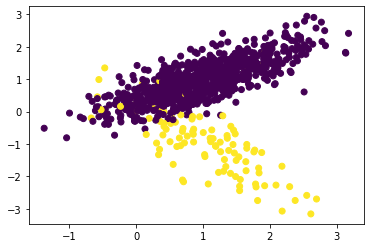

In [100]:
import matplotlib.pyplot as plt
plt.scatter(df_fianl['f1'], df_fianl['f2'], c = df_fianl['target'])

In [110]:
!pip install imblearn
!pip install imbalanced-learn


In [112]:
from imblearn.over_sampling import SMOTE


In [114]:
oversample = SMOTE()

In [115]:
X, y = oversample.fit_resample(df_fianl[['f1', 'f2']], df_fianl['target'])

In [116]:
X

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
1783,0.543027,-0.352315
1784,1.590452,-1.096252
1785,0.183450,-0.763456
1786,1.464374,-0.867773


In [117]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1783    1
1784    1
1785    1
1786    1
1787    1
Name: target, Length: 1788, dtype: int32

In [118]:
X.shape

(1788, 2)

In [119]:
y.shape

(1788,)

In [120]:
len(y[y==0])

894

In [121]:
len(y[y==1])

894

In [122]:
X

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
1783,0.543027,-0.352315
1784,1.590452,-1.096252
1785,0.183450,-0.763456
1786,1.464374,-0.867773


In [123]:
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

oversample = pd.concat([df1, df2], axis=1)

In [124]:
oversample

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,0.543027,-0.352315,1
1784,1.590452,-1.096252,1
1785,0.183450,-0.763456,1
1786,1.464374,-0.867773,1


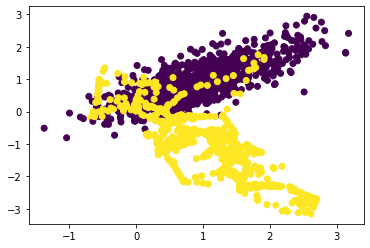

In [125]:
import matplotlib.pyplot as plt
plt.scatter(oversample['f1'], oversample['f2'], c = oversample['target'])